<a href="https://colab.research.google.com/github/khacnhuan14102002/20130090_HuynhKhacNhuan_BaitapML/blob/main/Lab_7_20130090_HuynhKhacNhuan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# This lab deals with **cross validation** for some classification algorithms and **clustering methods**. 

*   **Deadline: 23:59, 10/4/2023**



# Import libraries

In [2]:
# code
from sklearn import datasets
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from prettytable import PrettyTable
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from numpy import set_printoptions
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.ensemble import ExtraTreesClassifier

In [3]:
from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.cluster import KMeans

In [4]:
from google.colab import drive
drive.mount('/content/gdrive')
%cd '/content/gdrive/MyDrive/MachineLearning'

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
/content/gdrive/MyDrive/MachineLearning


#Task 1. With **iris** dataset
*  1.1. Apply **SVM** algorithm with cross validation


In [5]:
#code
iris = datasets.load_iris()




In [6]:
X = iris.data
y = iris.target

In [7]:
clf = svm.SVC(kernel='sigmoid',random_state=0)
scores = cross_validate(clf,X,y,scoring='accuracy',cv=10)

In [8]:
print(sorted(scores.keys()))
print(np.mean(scores['test_score']))

['fit_time', 'score_time', 'test_score']
0.06666666666666668


In [9]:
cv = KFold(n_splits=10, random_state=1,shuffle=True)
model = svm.SVC(kernel='rbf',random_state=0)
scores = cross_val_score(model,X,y,scoring="accuracy",cv=cv)
print(scores.mean())

0.96


*  1.2 Apply **feature selection** to the dataset and then use **RandomForest** algorithm with cross validation 

In [10]:
#code
X_new = SelectKBest(f_classif, k=3).fit_transform(X, y)

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.2, random_state=42)

In [12]:
rfc = RandomForestClassifier(n_estimators=10)

In [13]:
scores = cross_val_score(rfc, X_train, y_train, cv=5)

In [14]:
scores.mean()

0.925

#Task 2. With mnist dataset: 
*   2.1. Apply **K-Means** algorithm using k=10, 

In [15]:
# code
mnist = datasets.load_digits()

In [16]:
X = mnist.data
y = mnist.target

In [17]:
kmeans = KMeans(n_clusters=10, random_state=42)

In [18]:
kmeans.fit(X)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=10, random_state=42)

In [19]:
y_km = kmeans.predict(X)

In [20]:
cv = KFold(n_splits=10,random_state=1,shuffle=True)

In [ ]:
from scipy.stats import mode
from sklearn.metrics import accuracy_score

labels = np.zeros_like(y_km)
print(labels)
for i in range(3):
  print(i, '------------------------------')
  mask = (y_km == i)
  print(mask)
  labels[mask] = mode(mnist.target[mask])[0]
  print(labels) 
accuracy_score(mnist.target, labels)

*   2.2. Compare the obtained result with with other classification algorithms such as **Randomforest**, **kNN**, and **Naïve Bayes** in terms of accuracy, precision, recall, f1 using cross validation. 


In [24]:
model_ran = RandomForestClassifier(random_state=42)
model_knn = KNeighborsClassifier(n_neighbors=3)
model_nb = GaussianNB()

In [30]:
scores_ran_acc = cross_val_score(model_ran,X,y,scoring='accuracy',cv=cv)
scores_ran_pre = cross_val_score(model_ran,X,y,scoring='precision_weighted',cv=cv)
scores_ran_re = cross_val_score(model_ran,X,y,scoring='recall_weighted',cv=cv)
scores_ran_f1 = cross_val_score(model_ran,X,y,scoring='f1_weighted',cv=cv)

In [33]:
scores_knn_acc = cross_val_score(model_knn,X,y,scoring='accuracy',cv=cv)
scores_knn_pre = cross_val_score(model_knn,X,y,scoring='precision_weighted',cv=cv)
scores_knn_re = cross_val_score(model_knn,X,y,scoring='recall_weighted',cv=cv)
scores_knn_f1 = cross_val_score(model_knn,X,y,scoring='f1_weighted',cv=cv)


In [34]:
scores_nb_acc = cross_val_score(model_nb,X,y,scoring='accuracy',cv=cv)
scores_nb_pre = cross_val_score(model_nb,X,y,scoring='precision_weighted',cv=cv)
scores_nb_re = cross_val_score(model_nb,X,y,scoring='recall_weighted',cv=cv)
scores_nb_f1 = cross_val_score(model_nb,X,y,scoring='f1_weighted',cv=cv)

2.4. Apply **AgglomerativeClustering** algorithm to mnist dataset using the number of clusters is 10

In [36]:
from sklearn.datasets import fetch_openml
from sklearn.cluster import AgglomerativeClustering

In [37]:
agg = AgglomerativeClustering(n_clusters=10)
agg.fit(X)
y_agg = agg.labels_

# Print the number of samples in each cluster
unique, counts = np.unique(y_agg, return_counts=True)
print(dict(zip(unique, counts)))

{0: 181, 1: 317, 2: 197, 3: 196, 4: 191, 5: 178, 6: 181, 7: 178, 8: 80, 9: 98}


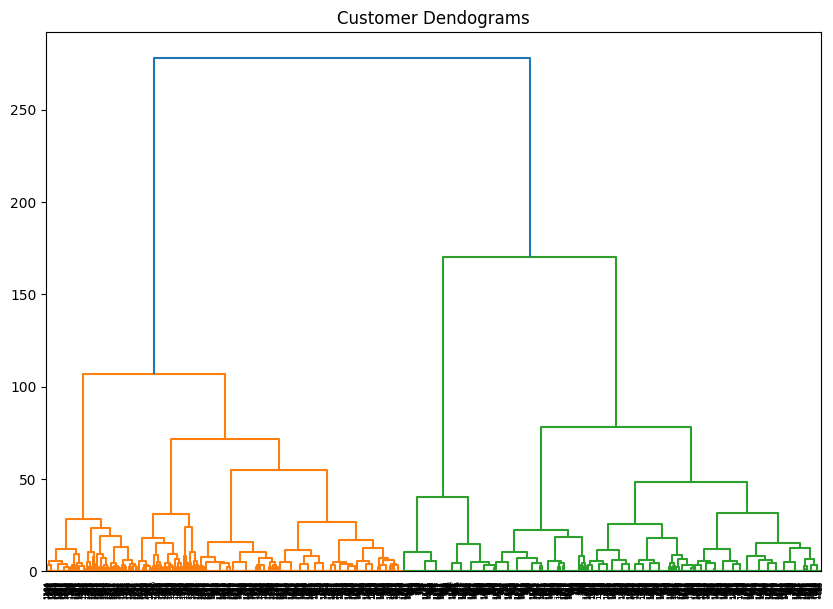

In [38]:
from matplotlib import pyplot as plt
from sklearn.datasets import load_iris
from scipy.cluster.hierarchy import dendrogram, linkage
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(10, 7))
plt.title("Customer Dendograms")
dend = shc.dendrogram(shc.linkage(mnist.data[:, 1:4], method='ward'))

#Task 3. 
For given dataset (shopping-data.csv) including 5 attributes: **CustomerID**, **Genre**, **Age**, **Annual Income**, and **Spending Score**.
*   3.1. Using the **scipy library** to create the dendrograms for the given dataset (remember drop categorical attributes: **CustomerID**, **Genre**)





In [39]:
#code
df = pd.read_csv('/content/gdrive/MyDrive/MachineLearning/Lab7/shopping-data (1).csv')

In [41]:
df = df.drop(['CustomerID', 'Genre'], axis=1)


In [43]:
X = np.array(df)

In [44]:
data = linkage(X, method='ward')

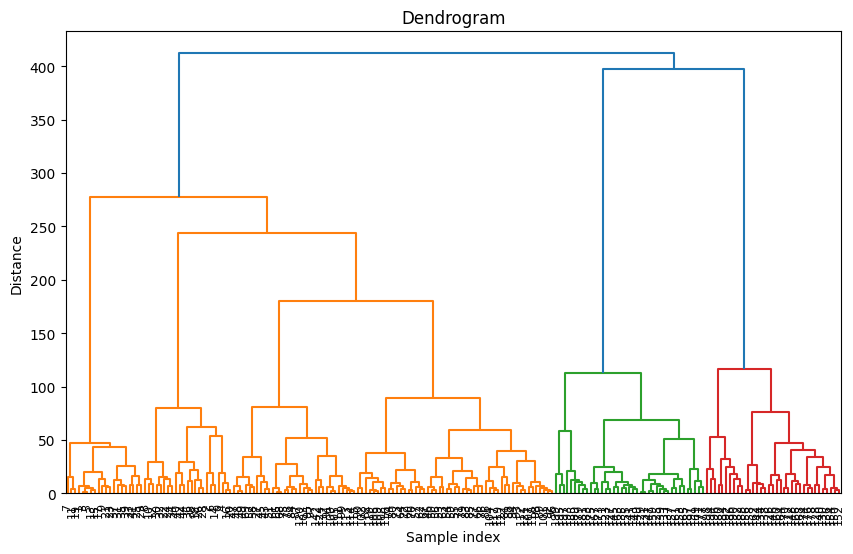

In [45]:
plt.figure(figsize=(10, 6))
plt.title("Dendrogram")
plt.xlabel("Sample index")
plt.ylabel("Distance")
dendrogram(data, leaf_rotation=90., leaf_font_size=8.)
plt.show()

*   3.2. Apply K-Means to the preprocessed dataset with k belongs to [2,10]. Then compute SSE values and plot them to find the best value of k.

In [46]:
#code
sse = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    sse.append(kmeans.inertia_)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

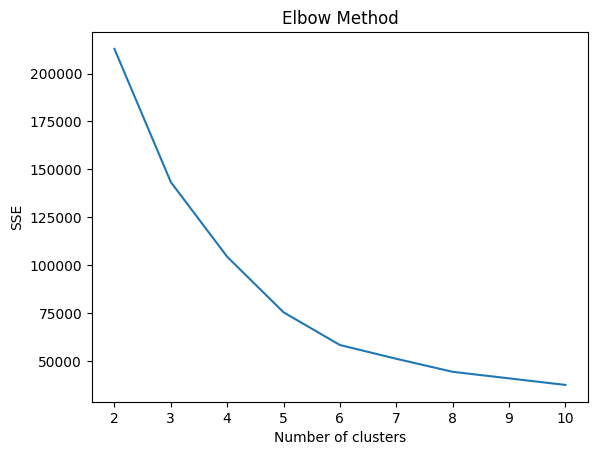

In [47]:
plt.plot(range(2, 11), sse)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.show()

*   3.2. From the obtained dengrograms, choose an appropriate number of clusters and apply **AgglomerativeClustering** algorithm to the given dataset

In [48]:
#code
agg = AgglomerativeClustering(n_clusters=2, linkage='ward')
agg.fit(X)
y_agg = agg.labels_

In [49]:
df['cluster'] = y_agg

In [52]:
unique, counts = np.unique(y_agg, return_counts=True)
print(dict(zip(unique, counts)))

{0: 74, 1: 126}


#Finally,
Save a copy in your Github. Remember renaming the notebook.